In [19]:
%matplotlib inline


In [20]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [21]:

images = []
labels = []
car_path = r'D:\Efim\thesis\melspecim\car'
no_car_path = r'D:\Efim\thesis\melspecim\no_car'

In [22]:
def read_images(path):
    with os.scandir(path) as entries:
        for entry in entries:
            images.append(cv2.imread(path + '\\' + entry.name))
            if 'no' in entry.name:
                labels.append(1)
            else:
                labels.append(0)

In [24]:
read_images(car_path)
read_images(no_car_path)

In [25]:
def form_train_set(data):    
      
    indexes = list(set([x for x in range(0,779)] + [x for x in range(864,3217)]))
    tr_set = np.take(data, indexes, 0)
    return tr_set

In [26]:
def form_test_set(data):
    
    indexes = list(set([x for x in range(780,863)] + [x for x in range(3023,3263)]))
    tr_set = np.take(data, indexes, 0)
    return tr_set

In [27]:
train_data = form_train_set(images) #/ 255.0#[:, :, 0]
train_labels = form_train_set(labels)
test_data = form_test_set(images) #/ 255.0#[:, :, 0]
test_labels = form_test_set(labels)

In [1]:
class_names = {0:'car', 1:'no car'}

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.models import load_model

Using TensorFlow backend.


In [3]:
check_data = []
check_label = []
path = r'D:\Efim\thesis\melspecim\check'
with os.scandir(path) as entries:
        for entry in entries:
            check_data.append(cv2.imread(path + '\\' + entry.name))
            if 'no' in entry.name:
                check_label.append(1)
            else:
                check_label.append(0)
check_data = np.array(check_data)
check_label = np.array(check_label)

In [4]:
model = load_model(r'D:\Efim\thesis\audio_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [5]:
predictions = model.predict(check_data)

In [6]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = predictions_array[0]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

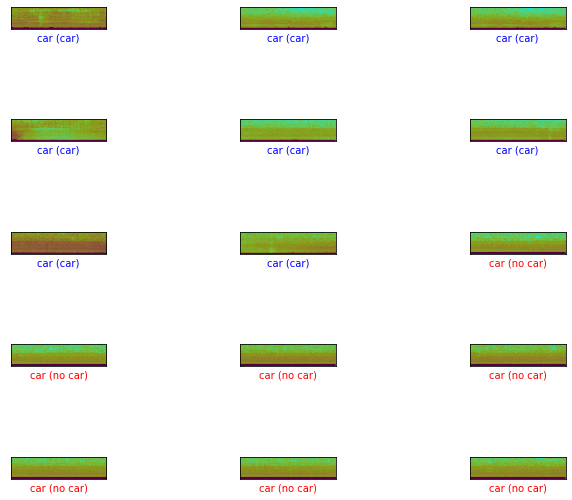

In [7]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, check_label, check_data)